In [198]:
#imports
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve, make_scorer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor,\
GradientBoostingClassifier
import xgboost  
from imblearn.over_sampling import SMOTE


In [98]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [99]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [100]:
df.shape

(5110, 12)

# Data Cleaning

In [101]:
df = df.drop(columns=['id'], axis=1)

In [102]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [103]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [104]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [105]:
df['bmi'] = df['bmi'].fillna(28.9)

In [106]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [107]:
df = df[df['gender']!='Other']

In [108]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
79.00     85
53.00     85
45.00     85
50.00     83
55.00     83
59.00     80
49.00     79
31.00     79
56.00     77
37.00     76
61.00     76
44.00     75
47.00     75
63.00     74
62.00     74
40.00     74
41.00     73
60.00     72
38.00     72
39.00     71
42.00     71
32.00     71
43.00     70
80.00     70
58.00     68
34.00     68
48.00     66
5.00      65
23.00     64
46.00     62
65.00     62
71.00     61
26.00     61
17.00     60
66.00     60
81.00     60
18.00     60
20.00     59
8.00      58
13.00     57
33.00     57
25.00     57
82.00     56
30.00     55
24.00     55
27.00     55
2.00      55
69.00     54
28.00     54
14.00     54
35.00     54
75.00     53
64.00     53
16.00     52
36.00     52
29.00     51
19.00     50
76.00     50
67.00     49
21.00     47
68.00     47
73.00     46
3.00      46
70.00     45
15.00     45
22.00     45
12.00     45
72.00     45
77.00     42
74.00     40
9.00      38
11.00     36

In [109]:
df[df['age']<=1].head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
844,Male,1.00,0,0,No,children,Rural,89.30,21.4,Unknown,0
951,Male,1.00,0,0,No,children,Rural,123.21,15.1,Unknown,0


In [110]:
df['age'].value_counts().sort_index()

0.08       2
0.16       3
0.24       5
0.32       5
0.40       2
0.48       3
0.56       5
0.64       4
0.72       5
0.80       4
0.88       5
1.00       5
1.08       8
1.16       4
1.24       8
1.32       8
1.40       3
1.48       6
1.56       4
1.64       8
1.72       6
1.80       9
1.88       8
2.00      55
3.00      46
4.00      34
5.00      65
6.00      24
7.00      32
8.00      58
9.00      38
10.00     35
11.00     36
12.00     45
13.00     57
14.00     54
15.00     45
16.00     52
17.00     60
18.00     60
19.00     50
20.00     59
21.00     47
22.00     45
23.00     64
24.00     55
25.00     57
26.00     61
27.00     55
28.00     54
29.00     51
30.00     55
31.00     79
32.00     71
33.00     57
34.00     68
35.00     54
36.00     52
37.00     76
38.00     72
39.00     71
40.00     74
41.00     73
42.00     71
43.00     70
44.00     75
45.00     85
46.00     62
47.00     75
48.00     66
49.00     79
50.00     83
51.00     86
52.00     90
53.00     85
54.00     87
55.00     83

# Exploratory Data Analysis

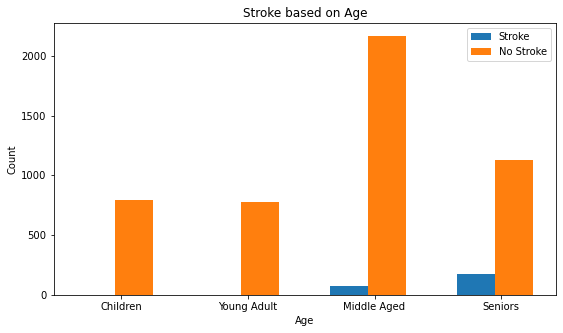

In [111]:
children = df[df['age']<=16]
young_adults = df[(df['age']>16) & (df['age']<=30)]
middle_aged = df[(df['age']>30) & (df['age']<=60)]
seniors = df[df['age']>60]

stroke_children = children[children['stroke']==1].count()['age']
stroke_ya = young_adults[young_adults['stroke']==1].count()['age']
stroke_ma = middle_aged[middle_aged['stroke']==1].count()['age']
stroke_seniors = seniors[seniors['stroke']==1].count()['age']

no_stroke_children = children[children['stroke']==0].count()['age']
no_stroke_ya = young_adults[young_adults['stroke']==0].count()['age']
no_stroke_ma = middle_aged[middle_aged['stroke']==0].count()['age']
no_stroke_seniors = seniors[seniors['stroke']==0].count()['age']

N = 4
def_ed_bar = (stroke_children, stroke_ya, stroke_ma, stroke_seniors)
no_def_ed_bar = (no_stroke_children, no_stroke_ya, no_stroke_ma, no_stroke_seniors)

# Position of bars on x-axis
ind = np.arange(N)
figure,axes=plt.subplots(figsize=(9,5))
width = 0.3       

plt.bar(ind, def_ed_bar , width, label= 'Stroke')
plt.bar(ind + width, no_def_ed_bar, width, label='No Stroke')

axes.set_xticks([0.2,1.2,2.2,3.2])
axes.set_xticklabels(['Children', 'Young Adult', 'Middle Aged', 'Seniors'])

axes.set_xlabel('Age')
axes.set_ylabel('Count')
axes.set_title('Stroke based on Age')
axes.legend()

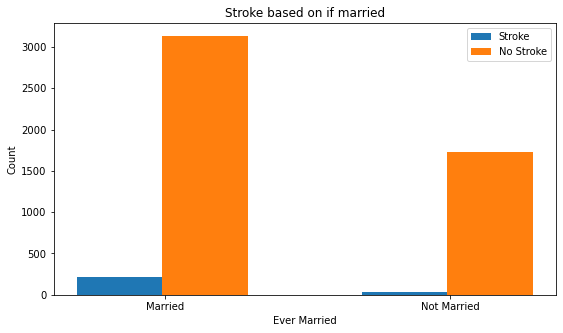

In [112]:
married = df[df['ever_married']=='Yes']
not_married = df[df['ever_married']=='No']

stroke_married = married[married['stroke']==1].count()['age']
no_stroke_married = married[married['stroke']==0].count()['age']

stroke_not_married =  not_married[not_married['stroke']==1].count()['age']
no_stroke_not_married =  not_married[not_married['stroke']==0].count()['age']


N=2

stroke_marriage = (stroke_married, stroke_not_married)
no_stroke_marriage = (no_stroke_married, no_stroke_not_married)

ind = np.arange(N)
figure,axes=plt.subplots(figsize=(9,5))
width = 0.3       

plt.bar(ind, stroke_marriage , width, label= 'Stroke')
plt.bar(ind + width, no_stroke_marriage, width, label='No Stroke')

axes.set_xticks([0.16,1.16])
axes.set_xticklabels(['Married','Not Married'])

axes.set_xlabel('Ever Married')
axes.set_ylabel('Count')
axes.set_title('Stroke based on if married')
axes.legend()

In [113]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

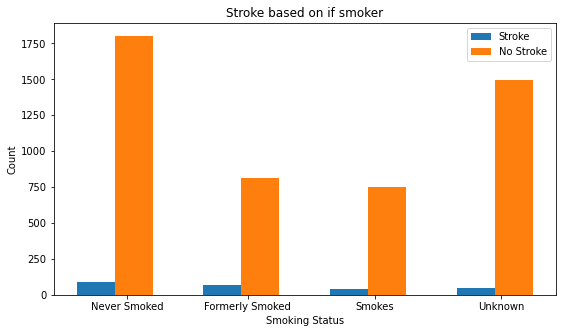

In [114]:
never_smoked = df[df['smoking_status']=='never smoked']
formerly_smoked = df[df['smoking_status']=='formerly smoked']
smokes = df[df['smoking_status']=='smokes']
unknown = df[df['smoking_status']=='Unknown']

#had stroke
s_never_smoked = never_smoked[never_smoked['stroke']==1].count()['age']
s_formerly_smoked = formerly_smoked[formerly_smoked['stroke']==1].count()['age']
s_smokes = smokes[smokes['stroke']==1].count()['age']
s_unknown = unknown[unknown['stroke']==1].count()['age']

#did not have stroke
ns_never_smoked = never_smoked[never_smoked['stroke']==0].count()['age']
ns_formerly_smoked = formerly_smoked[formerly_smoked['stroke']==0].count()['age']
ns_smokes = smokes[smokes['stroke']==0].count()['age']
ns_unknown = unknown[unknown['stroke']==0].count()['age']

N=4

stroke_smoke = (s_never_smoked, s_formerly_smoked, s_smokes, s_unknown)
no_stroke_smoke = (ns_never_smoked, ns_formerly_smoked, ns_smokes, ns_unknown)

ind = np.arange(N)
figure,axes=plt.subplots(figsize=(9,5))
width = 0.3       

plt.bar(ind, stroke_smoke , width, label= 'Stroke')
plt.bar(ind + width, no_stroke_smoke, width, label='No Stroke')

axes.set_xticks([0.25,1.2, 2.2, 3.2])
axes.set_xticklabels(['Never Smoked', 'Formerly Smoked', 'Smokes', 'Unknown'])

axes.set_xlabel('Smoking Status')
axes.set_ylabel('Count')
axes.set_title('Stroke based on if smoker')
axes.legend()

<BarContainer object of 4 artists>

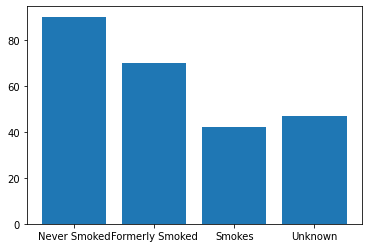

In [115]:
fig,ax = plt.subplots()
x = ['Never Smoked', 'Formerly Smoked', 'Smokes', 'Unknown']
y = stroke_smoke
ax.bar(x,y)

In [116]:
# ADD GRAPH OF JUST SMOKE DATA

In [117]:
norm_gluc = df[df['avg_glucose_level'] < 140]
pre_dib_gluc = df[(df['avg_glucose_level'] >= 140) & (df['avg_glucose_level'] < 200)]
dib_gluc = df[df['avg_glucose_level'] >= 200]
ns_norm_gluc = norm_gluc[norm_gluc['stroke'] == 0]
s_norm_gluc = norm_gluc[norm_gluc['stroke'] == 1]
ns_pre_dib_gluc = pre_dib_gluc[pre_dib_gluc['stroke'] == 0]
s_pre_dib_gluc = pre_dib_gluc[pre_dib_gluc['stroke'] == 1]
ns_dib_gluc = dib_gluc[dib_gluc['stroke'] == 0]
s_dib_gluc = dib_gluc[dib_gluc['stroke'] == 1]

<BarContainer object of 3 artists>

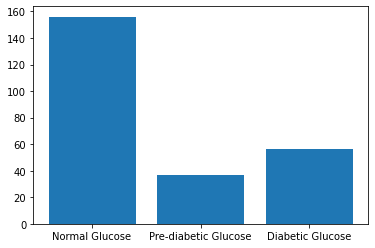

In [118]:
fig,ax = plt.subplots()
x = ['Normal Glucose', 'Pre-diabetic Glucose', 'Diabetic Glucose']
y = len(s_norm_gluc), len(s_pre_dib_gluc), len(s_dib_gluc)
ax.bar(x,y)

In [119]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1


In [120]:
#Hypertension
ns_hypertension = df[(df['hypertension'] == 1) & (df['stroke'] == 0)]
s_hypertension = df[(df['hypertension'] == 1) & (df['stroke'] == 1)]

<BarContainer object of 2 artists>

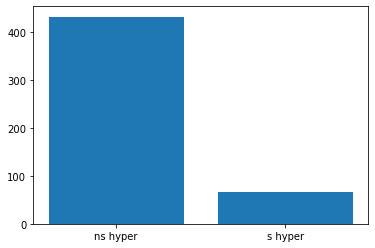

In [121]:
fig,ax = plt.subplots()
x = ['ns hyper', 's hyper']
y = [len(ns_hypertension), len(s_hypertension)]
ax.bar(x,y)

In [122]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1


In [123]:
#Heart Disease
ns_heart = df[(df['heart_disease'] == 1) & (df['stroke'] == 0)]
s_heart = df[(df['heart_disease'] == 1) & (df['stroke'] == 1)]

<BarContainer object of 2 artists>

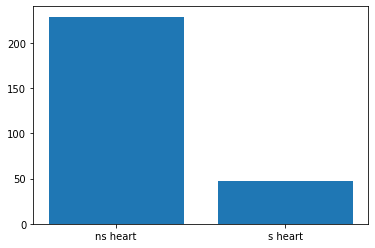

In [124]:
fig,ax = plt.subplots()
x = ['ns heart', 's heart']
y = [len(ns_heart), len(s_heart)]
ax.bar(x,y)

In [125]:
bmi_under = df[df['bmi'] < 18.5]
bmi_normal = df[(df['bmi'] >= 18.5) & (df['bmi'] <=24.9)]
bmi_over = df[(df['bmi'] >= 25) & (df['bmi'] <= 29.9)]
bmi_obese = df[df['bmi'] >= 30]

In [126]:
s_bmi_under = bmi_under[bmi_under['stroke'] == 1]
s_bmi_normal = bmi_normal[bmi_normal['stroke'] == 1]
s_bmi_over = bmi_over[bmi_over['stroke'] == 1]
s_bmi_obese = bmi_obese[bmi_obese['stroke'] == 1]

<BarContainer object of 4 artists>

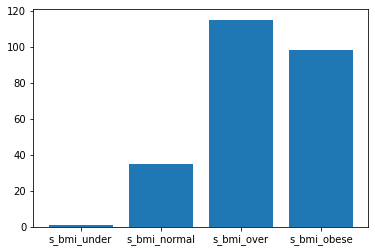

In [127]:
fig,ax = plt.subplots()
x = ['s_bmi_under', 's_bmi_normal', 's_bmi_over', 's_bmi_obese']
y = [len(s_bmi_under), len(s_bmi_normal), len(s_bmi_over), len(s_bmi_obese)]
ax.bar(x,y)

In [128]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [129]:
s_private = df[(df['work_type'] == 'Private') & (df['stroke'] == 1)]
s_self_employed = df[(df['work_type'] == 'Self-employed') & (df['stroke'] == 1)]
s_children = df[(df['work_type'] == 'children') & (df['stroke'] == 1)]
s_govt = df[(df['work_type'] == 'Govt_job') & (df['stroke'] == 1)]
s_never_worked = df[(df['work_type'] == 'Never_worked') & (df['stroke'] == 1)]

<BarContainer object of 5 artists>

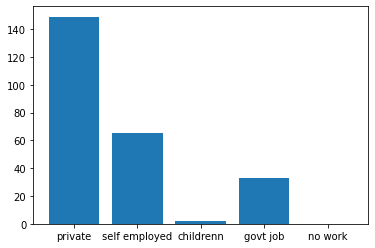

In [130]:

fig,ax = plt.subplots()
x = ['private', 'self employed', 'childrenn', 'govt job', 'no work']
y = [len(s_private), len(s_self_employed), len(s_children), len(s_govt), len(s_never_worked)]
ax.bar(x,y)

<BarContainer object of 2 artists>

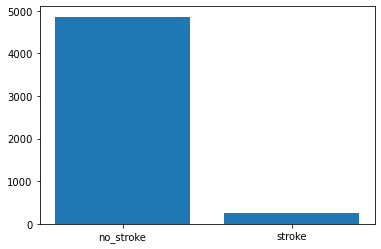

In [131]:
#Strokes - shows class imbalance
fig, ax = plt.subplots()
x = ['no_stroke', 'stroke']
y = [len(df[df['stroke'] == 0]), len(df[df['stroke'] == 1])]
ax.bar(x,y)

In [132]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [133]:
s_male = df[(df['gender'] == 'Male') & (df['stroke'] == 1)]
s_female = df[(df['gender'] == 'Female') & (df['stroke'] == 1)]


<BarContainer object of 2 artists>

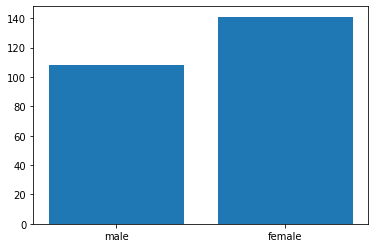

In [134]:
fig, ax = plt.subplots()
x = ['male', 'female']
y = [len(s_male), len(s_female)]
ax.bar(x,y)

In [135]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [136]:
s_urban = df[(df['Residence_type'] == 'Urban') & (df['stroke'] == 1)]
s_rural = df[(df['Residence_type'] == 'Rural') & (df['stroke'] == 1)]

<BarContainer object of 2 artists>

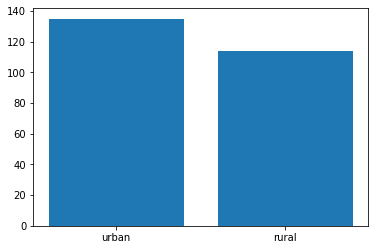

In [137]:
fig, ax = plt.subplots()
x = ['urban', 'rural']
y = [len(s_urban), len(s_rural)]
ax.bar(x,y)

# Feature Engineering

In [138]:
#heart_rf
df['heart_rf'] = df['heart_disease'] + df['hypertension']

In [139]:
x = list(df[df['stroke'] == 1]['heart_rf'].value_counts().index)
y = list(df[df['stroke'] == 1]['heart_rf'].value_counts().values)

<BarContainer object of 3 artists>

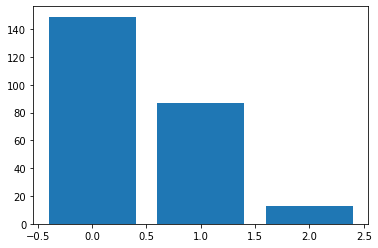

In [140]:
fig,ax = plt.subplots()
ax.bar(x,y)

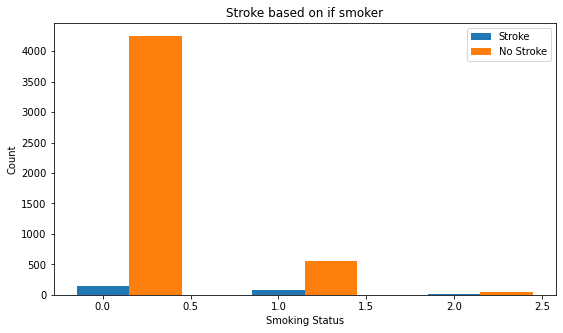

In [141]:
ns_low_rf = df[(df['heart_rf'] == 0) & (df['stroke'] == 0)]
ns_mid_rf = df[(df['heart_rf'] == 1) & (df['stroke'] == 0)]
ns_high_rf = df[(df['heart_rf'] == 2) & (df['stroke'] == 0)]

s_low_rf = df[(df['heart_rf'] == 0) & (df['stroke'] == 1)]
s_mid_rf = df[(df['heart_rf'] == 1) & (df['stroke'] == 1)]
s_high_rf = df[(df['heart_rf'] == 2) & (df['stroke'] == 1)]

N=3

stroke_heart_rf = (len(s_low_rf), len(s_mid_rf), len(s_high_rf))
no_stroke_heart_rf = (len(ns_low_rf), len(ns_mid_rf), len(ns_high_rf))

ind = np.arange(N)
figure,axes=plt.subplots(figsize=(9,5))
width = 0.3       

plt.bar(ind, stroke_heart_rf , width, label= 'Stroke')
plt.bar(ind + width, no_stroke_heart_rf, width, label='No Stroke')

# axes.set_xticks([0.25,1.2, 2.2, 3.2])
# axes.set_xticklabels(['Never Smoked', 'Formerly Smoked', 'Smokes', 'Unknown'])

axes.set_xlabel('Smoking Status')
axes.set_ylabel('Count')
axes.set_title('Stroke based on if smoker')
axes.legend()

In [142]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_rf
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,0


In [143]:
#bmi status

bmi_under = df[df['bmi'] < 18.5]
bmi_normal = df[(df['bmi'] >= 18.5) & (df['bmi'] <=24.9)]
bmi_over = df[(df['bmi'] >= 25) & (df['bmi'] <= 29.9)]
bmi_obese = df[df['bmi'] >= 30]

conditions = [(df['bmi'] < 18.5),
             ((df['bmi'] >= 18.5) & (df['bmi'] <=24.9)),
             ((df['bmi'] >= 25) & (df['bmi'] <= 29.9)),
             (df['bmi'] >= 30)]

choices = [('under'), ('normal'), ('over'), ('obese')]

df['bmi_status'] = np.select(conditions, choices)

In [144]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_rf,bmi_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,0,over


In [145]:
#gluc
norm_gluc = df[df['avg_glucose_level'] < 140]
pre_dib_gluc = df[(df['avg_glucose_level'] >= 140) & (df['avg_glucose_level'] < 200)]
dib_gluc = df[df['avg_glucose_level'] >= 200]

conditions = [(df['avg_glucose_level'] < 140), 
             ((df['avg_glucose_level'] >= 140) & (df['avg_glucose_level'] < 200)), 
             (df['avg_glucose_level'] >= 200)]

choices = [('normal'), ('pre_dibetic'), ('dibetic')]

df['gluc_status'] = np.select(conditions, choices)

In [146]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_rf,bmi_status,gluc_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,obese,dibetic
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,0,over,dibetic


# Dummy

In [147]:
cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
new_df = df[cols]

In [148]:
df_dum = pd.get_dummies(new_df, columns = ['gender', 'hypertension', 'heart_disease', 
                                      'ever_married', 'work_type', 'Residence_type', 
                                      'smoking_status'], drop_first=True)

In [149]:
df_dum.head(2)

,age,avg_glucose_level,bmi,stroke,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,0,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.9,1,0,0,0,1,0,0,1,0,0,0,1,0


# Model

In [150]:
y = df_dum['stroke']
X =df_dum.drop(columns=['stroke'], axis=1)

In [151]:
X.head(2)

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.9,0,0,0,1,0,0,1,0,0,0,1,0


In [152]:
y.head(2)

0    1
1    1
Name: stroke, dtype: int64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [154]:
X_train.head(2)

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1544,55.0,87.78,25.2,0,0,0,1,0,1,0,0,0,1,0,0
4311,65.0,205.78,41.7,0,0,0,1,0,1,0,0,0,0,1,0


In [155]:
df_scaler = StandardScaler()
df_scaler.fit(X_train)
X_train_sc = df_scaler.transform(X_train)
X_test_sc = df_scaler.transform(X_test)

In [156]:
logreg = LogisticRegression(random_state = 0)

In [157]:
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [158]:
logreg.predict(X_train_sc)

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
cross_val_score(logreg, X_train_sc, y_train, cv=3)

array([0.95223179, 0.95223179, 0.95144871])

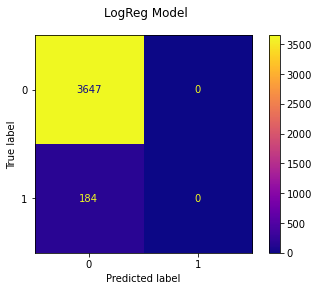

In [160]:
fig, ax = plt.subplots()

fig.suptitle("LogReg Model")

plot_confusion_matrix(logreg, X_train_sc, y_train, ax=ax, cmap="plasma");

## MODEL 2
add class weighted

In [161]:
logreg_2 = LogisticRegression(random_state = 0, class_weight = 'balanced')

In [162]:
logreg_2.fit(X_train_sc, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [163]:
logreg_2.predict(X_train_sc)

array([0, 1, 0, ..., 0, 0, 0])

In [164]:
cross_val_score(logreg_2, X_train_sc, y_train, cv=3)

array([0.74706343, 0.73610023, 0.75880971])

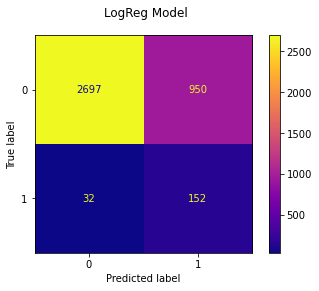

In [165]:
fig, ax = plt.subplots()

fig.suptitle("LogReg Model")

plot_confusion_matrix(logreg_2, X_train_sc, y_train, ax=ax, cmap="plasma");

### More iterations

In [166]:
logreg_model_more_iterations = LogisticRegression(random_state=0, max_iter=1000, class_weight = 'balanced')
logreg_model_more_iterations.fit(X_train_sc, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

### More regulation

In [167]:
logreg_model_more_regularization = LogisticRegression(random_state=0, C=0.01, class_weight = 'balanced')
logreg_model_more_regularization.fit(X_train_sc, y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=0)

### Higher tolerance

In [168]:
logreg_model_higher_tolerance = LogisticRegression(random_state=0, tol=50, class_weight = 'balanced')
logreg_model_higher_tolerance.fit(X_train_sc, y_train)

LogisticRegression(class_weight='balanced', random_state=0, tol=50)

In [169]:
print(cross_val_score(logreg_model_more_iterations, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model_more_regularization, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model_higher_tolerance, X_train_sc, y_train, cv=3))

[0.74706343 0.73610023 0.75880971]
[0.73531715 0.73375098 0.75254503]
[0.73766641 0.74158183 0.75019577]


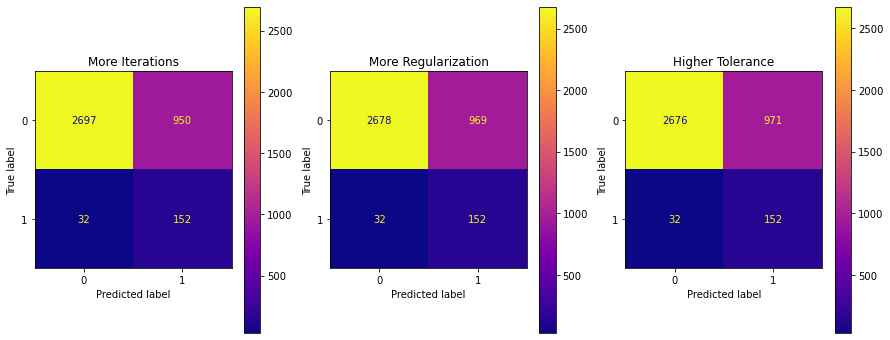

In [170]:
fix, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("More Regularization")
axes[2].set_title("Higher Tolerance")

plot_confusion_matrix(logreg_model_more_iterations, X_train_sc, y_train,
                      ax=axes[0], cmap="plasma")
plot_confusion_matrix(logreg_model_more_regularization, X_train_sc, y_train,
                      ax=axes[1], cmap="plasma")
plot_confusion_matrix(logreg_model_higher_tolerance, X_train_sc, y_train,
                      ax=axes[2], cmap="plasma");

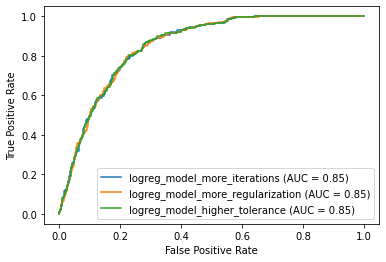

In [171]:
fig, ax = plt.subplots()

plot_roc_curve(logreg_model_more_iterations, X_train_sc, y_train, 
               name='logreg_model_more_iterations', ax=ax)
plot_roc_curve(logreg_model_more_regularization, X_train_sc, y_train, 
               name='logreg_model_more_regularization', ax=ax)
plot_roc_curve(logreg_model_higher_tolerance, X_train_sc, y_train, 
               name='logreg_model_higher_tolerance', ax=ax)

# Decision Tree

In [172]:
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state=0) 
tree_clf.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [173]:
print(cross_val_score(tree_clf, X_train_sc, y_train, cv=3))

[0.92325764 0.93108849 0.90681284]


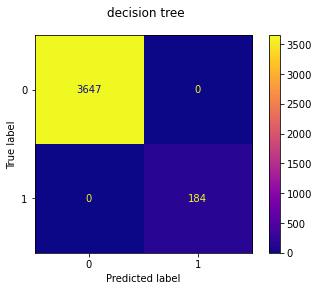

In [174]:
#NOT SURE WHY NO MISSES
fig, ax = plt.subplots()

fig.suptitle("decision tree")

plot_confusion_matrix(tree_clf, X_train_sc, y_train, ax=ax, cmap="plasma");

In [175]:
#Grid Search For Decision Tree
gs = DecisionTreeClassifier(class_weight='balanced', random_state=0)
params_grid ={'criterion':['gini', 'entropy'],
              'max_depth':[None, 5, 3, 2],
              'min_samples_split': [2,10,20]}

gridsearch_model = GridSearchCV(estimator=gs, param_grid = params_grid)
gridsearch_model.fit(X_train_sc, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3, 2],
                         'min_samples_split': [2, 10, 20]})

In [176]:
best = gridsearch_model.best_estimator_
best.score(X_train_sc, y_train)
cross_val_score(best, X_train_sc, y_train, cv = 6)

array([0.92331768, 0.93270736, 0.92175274, 0.90282132, 0.92319749,
       0.9184953 ])

In [ ]:
[0.92325764 0.93108849 0.90681284]

In [177]:
#Check Test
cross_val_score(best, X_test, y_test, cv = 6)

array([0.92957746, 0.9342723 , 0.90610329, 0.9342723 , 0.90610329,
       0.90610329])

# Random Forest

In [219]:
forest = RandomForestClassifier(class_weight='balanced', random_state = 0)
forest.fit(X_train_sc, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [220]:
print(cross_val_score(forest, X_train_sc, y_train, cv=3))

[0.95301488 0.95144871 0.94988254]


In [180]:
# #Grid Search For random forest
# gs_rf = RandomForestClassifier(class_weight='balanced', random_state=0)

# random_grid_rf = {'bootstrap': [True, False],
#  'max_depth': [10, 30, 50, 100],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 1200, 2000]}

# gridsearch_model_rf = GridSearchCV(estimator=gs_rf, param_grid = random_grid_rf)
# gridsearch_model_rf.fit(X_train_sc, y_train)

# Hyperparamter Adjustments
#### Different Solvers

In [183]:
logreg_model = LogisticRegression(random_state=0, solver="liblinear", class_weight='balanced')
logreg_model.fit(X_train_sc, y_train)

print(cross_val_score(logreg_model, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model, X_test_sc, y_test, cv=3))


[0.74549726 0.73531715 0.75724354]
[0.75117371 0.75586854 0.75352113]


In [185]:
logreg_model = LogisticRegression(random_state=0, solver="liblinear", C=0.01, class_weight='balanced')
logreg_model.fit(X_train_sc, y_train)

print(cross_val_score(logreg_model, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model, X_test_sc, y_test, cv=3))

[0.70321065 0.69929522 0.71025842]
[0.6971831  0.71126761 0.68544601]


In [186]:
logreg_model = LogisticRegression(random_state=0, solver="liblinear", penalty="l1", class_weight='balanced')
logreg_model.fit(X_train_sc, y_train)

print(cross_val_score(logreg_model, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model, X_test_sc, y_test, cv=3))

[0.74628034 0.73610023 0.75880971]
[0.74882629 0.75117371 0.75352113]


In [187]:
logreg_model = LogisticRegression(random_state=0, solver="liblinear", penalty="l1", C=0.01, class_weight='balanced')
logreg_model.fit(X_train_sc, y_train)

print(cross_val_score(logreg_model, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model, X_test_sc, y_test, cv=3))

[0.67188724 0.66718872 0.66797181]
[0.55164319 0.54225352 0.57511737]


In [188]:
logreg_model = LogisticRegression(random_state=0, solver="liblinear", C=0.0001, class_weight='balanced')
logreg_model.fit(X_train_sc, y_train)

print(cross_val_score(logreg_model, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model, X_test_sc, y_test, cv=3))

[0.54737666 0.53876273 0.52623336]
[0.55164319 0.57511737 0.57981221]


In [190]:
logreg_model = LogisticRegression(random_state=0, solver="liblinear", C=0.00001, class_weight='balanced')
logreg_model.fit(X_train_sc, y_train)

print(cross_val_score(logreg_model, X_train_sc, y_train, cv=3))
print(cross_val_score(logreg_model, X_test_sc, y_test, cv=3))

[0.53249804 0.52701644 0.51213782]
[0.54460094 0.5657277  0.57746479]


# KNN

In [193]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
knn.score(X_train_sc, y_train)

0.9530148786217698

In [195]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_sc, y_train)
knn2.score(X_train_sc, y_train)

0.9558861915948839

In [196]:
cross_val_score(knn2, X_train_sc, y_train, cv=3)

array([0.94440094, 0.94048551, 0.94361785])

# Boosting

In [205]:
grad_boost_class = xgboost.XGBClassifier(random_state=0, objective='binary:logistic')

grad_boost_class.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [206]:
cross_val_score(grad_boost_class, X_test_sc, y_test, cv=5)

array([0.94140625, 0.9296875 , 0.9296875 , 0.94509804, 0.93333333])

# Picking our Best Model

In [209]:
# Create a way to categorize our different models
model_candidates = [
    
    {
        'name':'LogReg'
        ,'model':logreg_2
        ,'X_test':X_test_sc
        ,'y_test':y_test
    },
    
    {
        'name':'LogReg iterations'
        ,'model':logreg_model_more_iterations
        ,'X_test':X_test_sc
        ,'y_test':y_test
    },
    {
        'name':'LogReg regularization'
        ,'model':logreg_model_more_regularization
        ,'X_test':X_test_sc
        ,'y_test':y_test
    },
    {
        'name':'LogReg higher_tolerance'
        ,'model':logreg_model_higher_tolerance
        ,'X_test':X_test_sc
        ,'y_test':y_test
    },
   
    {
        'name':'DecisionTree'
        ,'model':tree_clf
        ,'X_test': X_test_sc
        ,'y_test':y_test
    },
    {
        'name':'GridSearchbest'
        ,'model':best
        ,'X_test':X_test_sc
        ,'y_test':y_test
    },
    {
        'name':'RandomForest'
        ,'model':forest
        ,'X_test':X_test_sc
        ,'y_test':y_test
    },
        {
        'name':'KNN'
        ,'model':knn2
        ,'X_test':X_test_sc
        ,'y_test':y_test
    }
]

In [212]:
final_scores_dict = {
    "Model Name": [candidate.get('name') for candidate in model_candidates],
    "Mean Accuracy": [
        candidate.get('model').score(
                                candidate.get('X_test'), 
                                candidate.get('y_test')
        ) 
        for candidate in model_candidates
    ]
    
}
final_scores_df = pd.DataFrame(final_scores_dict).set_index('Model Name')
final_scores_df

,Mean Accuracy
Model Name,
LogReg,0.751956
LogReg iterations,0.751956
LogReg regularization,0.750391
LogReg higher_tolerance,0.748826
DecisionTree,0.926448
GridSearchbest,0.926448
RandomForest,0.946792
KNN,0.946009


# SMOTE

In [213]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_sc, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    4860
1     249
Name: stroke, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    3647
0    3647
Name: stroke, dtype: int64


In [215]:
forest = RandomForestClassifier(class_weight='balanced', random_state = 0)
forest.fit(X_train_resampled, y_train_resampled)
print(cross_val_score(forest, X_train_resampled, y_train_resampled, cv=3).mean())

0.9492745950514913


In [225]:
print(cross_val_score(forest, X_test, y_test, cv=3).mean())

0.9491392801251957


In [216]:
#Grid Search For random forest
gs_rf = RandomForestClassifier(class_weight='balanced', random_state=0)

random_grid_rf = {'bootstrap': [True, False],
 'max_depth': [10, 30, 50],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]}

gridsearch_model_rf = GridSearchCV(estimator=gs_rf, param_grid = random_grid_rf)
gridsearch_model_rf.fit(X_train_sc, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 30, 50],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]})

In [227]:
best_rf = gridsearch_model_rf.best_estimator_
best_rf.score(X_train_resampled, y_train_resampled)
cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv = 6)

array([0.93421053, 0.96546053, 0.96957237, 0.96299342, 0.96378601,
       0.96296296])

In [224]:
cross_val_score(best_rf, X_test, y_test, cv = 6).mean()

0.9483568075117371

# Final Model

Random Forest after SMOTE is our best model.

In [ ]:
forest = RandomForestClassifier(class_weight='balanced', random_state = 0)
forest.fit(X_train_resampled, y_train_resampled)
print(cross_val_score(forest, X_train_resampled, y_train_resampled, cv=3).mean())